<a href="https://colab.research.google.com/github/shubh7185/ML_Projects/blob/main/Truth_seeker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset=pd.read_csv('/content/truth_seek.csv')

In [5]:
dataset.head()

,Unnamed: 0,author,statement,target,BinaryNumTarget,manual_keywords,tweet,5_label_majority_answer,3_label_majority_answer
0,0,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders - 6 Month Update\n\nInfl...,Mostly Agree,Agree
1,1,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,NO MAJORITY,Agree
2,2,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",THE SUPREME COURT is siding with super rich pr...,Agree,Agree
3,3,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders\n\nBroken campaign promi...,Mostly Agree,Agree
4,4,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@OhComfy I agree. The confluence of events rig...,Agree,Agree


In [8]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

# Assuming you have the original dataset stored in the 'dataset' variable
# and 'dataset' has a column named 'statement' containing the text data
# and 'dataset' has a column named '3_label_majority_answer' containing the target variable

# Preprocess the text data
corpus = []
for i in range(len(dataset)):
    review = re.sub('[^a-zA-Z]', ' ', str(dataset['statement'][i]))
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# Check the lengths of 'corpus' and 'y'
print(len(corpus))  # Check length of 'corpus'
print(len(dataset['3_label_majority_answer']))  # Check length of 'y'

# Align the lengths of 'corpus' and 'y'
min_length = min(len(corpus), len(dataset['3_label_majority_answer']))
corpus = corpus[:min_length]
y = dataset['3_label_majority_answer'][:min_length]

# Apply CountVectorizer on 'corpus'
cv = CountVectorizer(max_features=1500)
x = cv.fit_transform(corpus).toarray()

# Create a DataFrame for the transformed text features
transformed_dataset = pd.DataFrame(x)

# Add the '3_label_majority_answer' column (dummy variables) to the transformed dataset
transformed_dataset['3_label_majority_answer'] = y

# Display the transformed dataset
print(transformed_dataset)


10190
10190
       0  1  2  3  4  5  6  7  8  9  ...  363  364  365  366  367  368  369  \
0      0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
1      0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
2      0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
3      0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
4      0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
...   .. .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...   
10185  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
10186  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
10187  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
10188  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
10189  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   

       370  371  3_label_majority_answe

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 1500)
x=cv.fit_transform(corpus).toarray()
y= pd.get_dummies(dataset['3_label_majority_answer'])
y=y.iloc[:,1].values

In [13]:
print(len(corpus))  # Check length of 'corpus'
print(len(y))       # Check length of 'y'

10190
10190


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

**Naive Bayes**

In [15]:
from sklearn.naive_bayes import MultinomialNB
truth_detect = MultinomialNB().fit(x_train,y_train)
y_pred=truth_detect.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test,y_pred)
accuracy

0.8812561334641805

****

**LogisticRegression**

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test,y_pred)
accuracy

0.8812561334641805

**SVM**

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix , accuracy_score
classifier= SVC(kernel='linear',random_state=0)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test,y_pred)


0.9563297350343474

In [18]:
from sklearn.metrics import confusion_matrix 
cm=confusion_matrix(y_test,y_pred)

**Confusion Matrix**

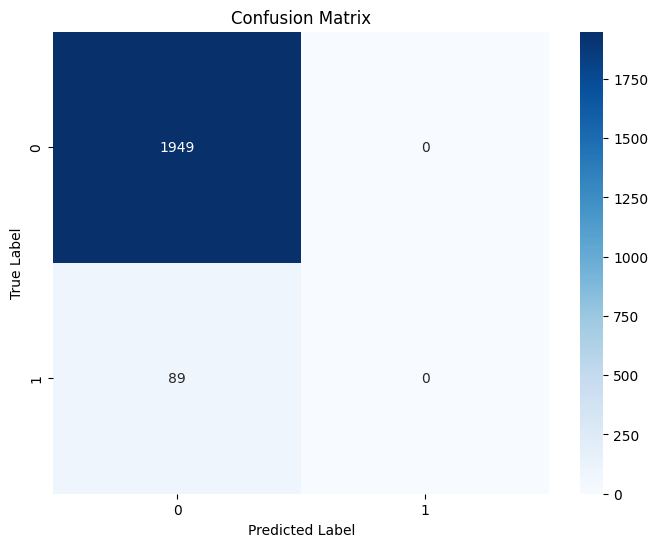

In [19]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
